In [ ]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

# Область работы 1 (библиотеки)

In [ ]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder, TargetEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.preprocessing import PolynomialFeatures, QuantileTransformer, PowerTransformer
from sklearn.model_selection import train_test_split 

from sklearn.preprocessing import PolynomialFeatures

from sklearn.compose import ColumnTransformer, make_column_transformer, TransformedTargetRegressor\

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor

import category_encoders as ce

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score


from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection  import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFpr
from sklearn.feature_selection import SelectFdr
from sklearn.feature_selection import SelectFwe
from sklearn.feature_selection import f_regression

# Область работы 2 (выбор модели)

In [7]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# оставляйте свои комментарии и разъяснения
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train_house_B.csv'# содержит только имя файла, без имен папок !!!

In [8]:
df = pd.read_csv(path_train)
df

,price,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
0,2604000,1.222962,0.047686,-1.033389,-2.465344,0.831065,0.802990,1.590989,0.727946,0.893957,...,-0.141322,-0.554035,-1.308863,-0.570187,-0.882735,-0.805741,-0.929397,0.232557,-0.679063,1.307431
1,4900000,-0.091662,-0.356325,-0.486840,-2.465344,-0.126718,-0.024866,-0.323972,1.658337,1.751428,...,-0.141322,-0.554035,0.047278,-0.570187,-0.897850,-0.805741,0.224410,0.864016,1.472618,-0.478408
2,4480000,1.222962,-1.064819,0.338749,0.405623,-0.854973,-0.654330,0.525426,0.585866,-1.661101,...,-0.141322,-0.554035,-1.308863,-0.570187,-0.491114,0.355976,-0.929397,1.118967,1.472618,1.307431
3,3234000,1.222962,-1.570692,-0.696696,0.405623,-0.670784,-0.024866,0.557116,-1.280083,1.273040,...,-0.141322,-0.554035,1.403419,-0.570187,-0.724485,-0.805741,0.224410,0.924687,-0.679063,-0.478408
4,3780000,-1.406286,-1.563680,-1.058295,0.405623,-0.126718,-0.879174,-1.649281,0.496669,0.255596,...,-0.141322,1.804941,0.047278,-0.570187,-0.306965,-0.805741,1.378217,0.170486,-0.679063,-0.478408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,3360000,-0.091662,0.593876,-0.087882,-2.465344,0.077307,0.151482,1.452151,1.772175,-1.264971,...,-0.141322,-0.554035,1.403419,-0.570187,0.454355,-0.805741,1.378217,1.200306,-0.679063,1.307431
404,5950000,-1.406286,0.179794,0.640850,0.405623,-0.126718,-0.975186,-1.028510,0.203867,-1.190658,...,-0.141322,1.804941,0.047278,-0.570187,-1.037904,1.517692,-0.929397,0.960546,-0.679063,-0.478408
405,3675000,-0.091662,1.099966,0.225750,-2.465344,-0.716123,-0.534316,-0.090348,1.151380,1.631097,...,-0.141322,-0.554035,-1.308863,-0.570187,0.477182,-0.805741,-0.929397,-1.512245,-0.679063,1.307431
406,7455000,1.222962,1.498909,-0.392289,0.405623,-0.126718,-0.024866,1.484438,-1.233671,-0.469048,...,-0.141322,-0.554035,0.047278,1.421812,0.407275,0.355976,0.224410,-1.477806,-0.679063,-0.478408


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   408 non-null    int64  
 1   0       408 non-null    float64
 2   1       408 non-null    float64
 3   2       408 non-null    float64
 4   3       408 non-null    float64
 5   4       408 non-null    float64
 6   5       408 non-null    float64
 7   6       408 non-null    float64
 8   7       408 non-null    float64
 9   8       408 non-null    float64
 10  9       408 non-null    float64
 11  10      408 non-null    float64
 12  11      408 non-null    float64
 13  12      408 non-null    float64
 14  13      408 non-null    float64
 15  14      408 non-null    float64
 16  15      408 non-null    float64
 17  16      408 non-null    float64
 18  17      408 non-null    float64
 19  18      408 non-null    float64
 20  19      408 non-null    float64
 21  20      408 non-null    float64
 22  21

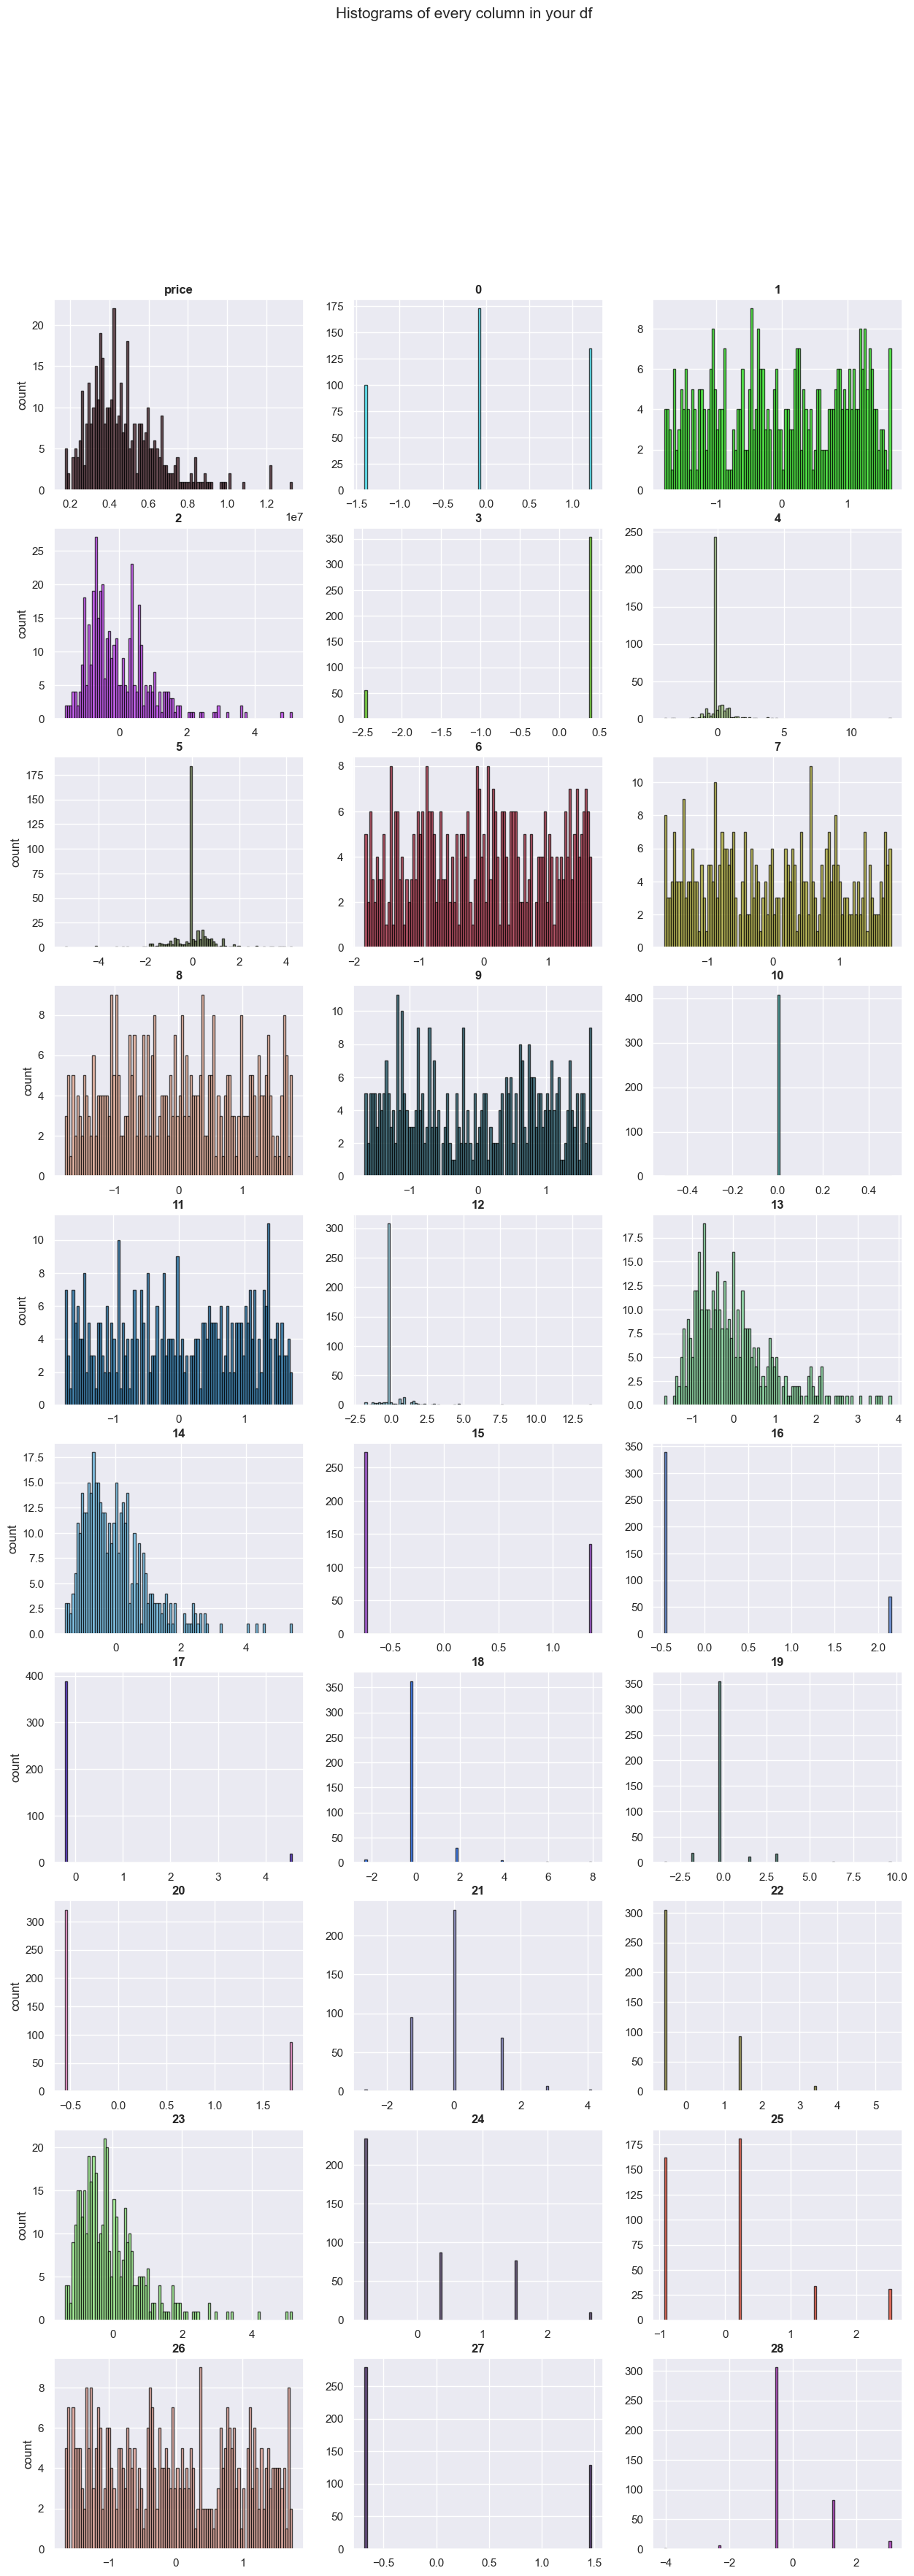

In [11]:
def histmaker_for_numeric_df(df):
    """рисует хистплоты для каждого столбца датафрейма. 
    Если в дф-е есть столбцы, которые не нужно рисовать, их стоит удалить """
    #оставим только численные столбцы 
    cond = [np.issubdtype(df[f'{column}'], np.number) for column in df.columns]
    df = df[df.columns[cond]]
    
    sns.set(style='darkgrid', palette='deep')

    array_of_columns_of_df = df.values.T.tolist()

    num_plots = len(df.columns)         #количество графиков
    num_rows = (num_plots - 1) // 3 + 1 #количество строк 
    num_cols = min(num_plots, 3)        #количество столбцов

    fig, axes = plt.subplots(num_rows, num_cols, figsize = (15, 4*num_rows))
    plt.suptitle('Histograms of every column in your df', fontsize = 15)
    for i, ax in enumerate(axes.flat):
        col = (np.random.random (), np.random.random (), np.random.random ()) #случайный увет
        if i < num_plots:
            ax.hist(array_of_columns_of_df[i],
                    bins = 100,
                    edgecolor = 'black', color = col, alpha = 0.7)
            ax.set_title(df.columns[i], weight='bold')
        if i % 3 == 0:
            ax.set_ylabel('count')
    
    #Удаление пустых подграфиков
    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

histmaker_for_numeric_df(df) 

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28'], dtype=object)

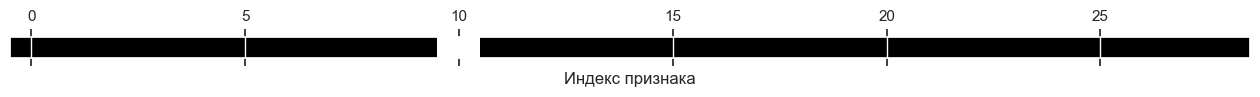

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['price']), df['price'],
                                                    random_state=42)

ths = (.9 * (1 - .9))
cancer_var = VarianceThreshold(threshold = ths)
cancer_var.fit_transform(X_train)
mask = cancer_var.get_support()


plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.5)
plt.yticks([])
plt.xlabel("Индекс признака")
cancer_var.get_support().sum()
cancer_var.get_feature_names_out()


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


array(['0', '1', '2', '4', '12', '16', '18', '19', '20', '22', '24', '27'],
      dtype=object)

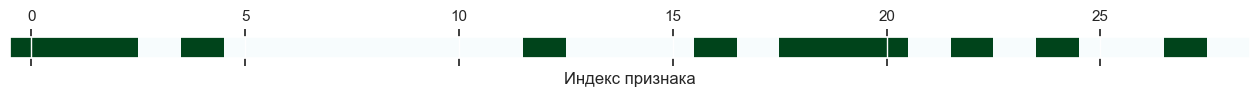

In [61]:
select_pct = SelectPercentile(percentile=40)
select_pct.fit(X_train, y_train)
# преобразовываем обучающий набор
X_train_selected = select_pct.transform(X_train)

mask4 = select_pct.get_support()
plt.matshow( mask4.reshape(1,-1), cmap = 'BuGn', aspect=0.5)
plt.yticks([])
plt.xlabel("Индекс признака");
select_pct.get_feature_names_out()

array(['0', '2', '4', '5', '6', '12', '15', '16', '19', '20', '22', '24',
       '25', '27'], dtype=object)

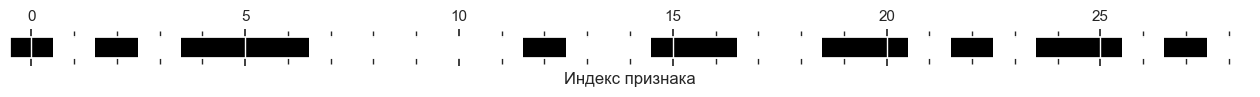

In [57]:
rfe_select = RFE(Lasso())

rfe_select.fit(X_train, y_train)


# визуализируем отобранные признаки:
mask3 = rfe_select.get_support()
plt.matshow( mask3.reshape(1,-1), cmap = 'gray_r', aspect=0.5)
plt.yticks([])
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xlabel("Индекс признака");
mask3.sum()
rfe_select.get_feature_names_out()

array(['2', '12', '20', '22', '24', '25', '27'], dtype=object)

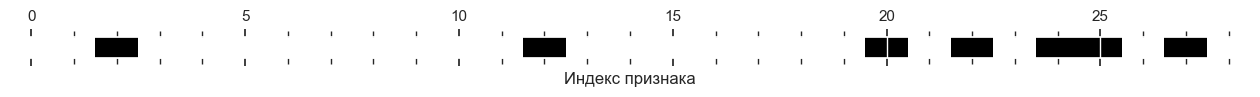

In [60]:
kbest = SelectKBest(f_regression, k=7)

kbest.fit(X_train, y_train)


# визуализируем отобранные признаки:
mask2 = kbest.get_support()
plt.matshow( mask2.reshape(1,-1), cmap = 'gray_r', aspect=0.5)
plt.yticks([])
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xlabel("Индекс признака");
mask2.sum()
kbest.get_feature_names_out()

array(['0', '2', '3', '4', '12', '16', '18', '19', '20', '21', '22', '24',
       '25', '27'], dtype=object)

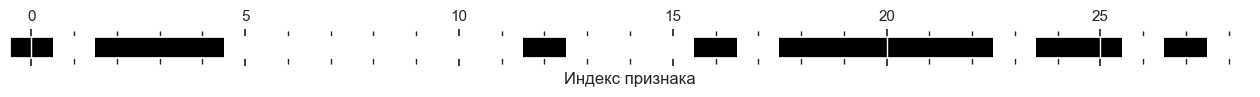

In [40]:
fwe = SelectFwe(f_regression, alpha = 0.01)

fwe.fit(X_train, y_train)


# визуализируем отобранные признаки:
mask1 = fwe.get_support()
plt.matshow( mask1.reshape(1,-1), cmap = 'gray_r', aspect=0.5)
plt.yticks([])
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xlabel("Индекс признака");
mask1.sum()
fwe.get_feature_names_out()

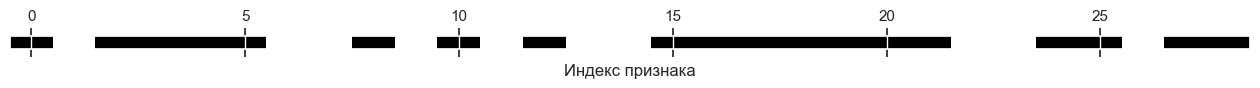

In [17]:
select_f = SequentialFeatureSelector(
             RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = -1),
             n_features_to_select=19, 
             direction="forward")

select_f.fit(X_train, y_train)
# визуализируем отобранные признаки:
mask = select_f.get_support()
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.3)
plt.yticks([])
plt.xlabel("Индекс признака");
plt.show();

In [18]:
select_f.get_feature_names_out()

array(['0', '2', '3', '4', '5', '8', '10', '12', '15', '16', '17', '18',
       '19', '20', '21', '24', '25', '27', '28'], dtype=object)

In [62]:
col = ['0', '2', '4', '12', '16', '18', '22', '24', '25', '27']

In [63]:
X_train_new = X_train.loc[:, col]
X_test_new = X_test.loc[:, col]

In [64]:
num_feat = ['0', '2', '4', '12', '16', '18', '22', '24', '25', '27']

num = Pipeline(
       [('scaler', RobustScaler())])


CT = ColumnTransformer([
    ("num", num, num_feat)
])

display(CT)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', RobustScaler())]),
                                 ['0', '2', '4', '12', '16', '18', '22', '24',
                                  '25', '27'])])

In [95]:
model = Pipeline([
                ('model', TransformedTargetRegressor(
                        regressor = Pipeline(steps=[
                                ('preproc', CT),
                                ('estimator', Ridge())
                            ]),
                        transformer=PowerTransformer(),
                        check_inverse = False)
                )])


p = np.arange(1,11)
ng = np.arange(1,100,5)
param_grid = [
    {'model__regressor__estimator':[KNeighborsRegressor()],
    'model__regressor__estimator__n_neighbors': ng,
    'model__regressor__estimator__p': p,
    'model__regressor__estimator__weights': ['distance', 'uniform'],
    'model__regressor__estimator__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'model__regressor__preproc__num__scaler': [StandardScaler(), RobustScaler(), MinMaxScaler(), Normalizer()],
    'model__transformer': [PowerTransformer(), QuantileTransformer()]   
    }]


grid_knn = GridSearchCV(model, param_grid, scoring = 'neg_mean_absolute_percentage_error', n_jobs=-1)
grid_knn.fit(X_train_new, y_train)
grid_knn

#3:06 #3:08

GridSearchCV(estimator=Pipeline(steps=[('model',
                                        TransformedTargetRegressor(check_inverse=False,
                                                                   regressor=Pipeline(steps=[('estimator',
                                                                                              Ridge())]),
                                                                   transformer=PowerTransformer()))]),
             n_jobs=-1,
             param_grid=[{'model__regressor__estimator': [KNeighborsRegressor(algorithm='ball_tree',
                                                                              n_neighbors=11)],
                          'model__regressor__estimator__algorithm': ['auto',
                                                                     'ball_tr...
                                                                     'brute'],
                          'model__regressor__estimator__n_neighbors': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96]),
                          'model__regressor__estimator__p': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                          'model__regressor__estimator__weights': ['distance',
                                                                   'uniform'],
                          'model__transformer': [PowerTransformer(),
                                                 QuantileTransformer()]}],
             scoring='neg_mean_absolute_percentage_error')

In [96]:
grid_result_knn = pd.DataFrame(grid_knn.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result_knn

,886,2486,86,1686,126,1726,926,2526,2530,130,...,1635,2435,32,34,832,834,1632,1634,2432,2434
mean_fit_time,0.013621,0.008794,0.010734,0.010652,0.012447,0.010318,0.014817,0.009613,0.008926,0.005006,...,0.006936,0.013007,0.00861,0.008742,0.010512,0.00982,0.010564,0.010074,0.011707,0.013534
std_fit_time,0.002404,0.001324,0.005452,0.005733,0.007164,0.001754,0.003396,0.001351,0.000774,0.006546,...,0.006102,0.003036,0.00081,0.000859,0.003936,0.000759,0.00582,0.007053,0.001723,0.004095
mean_score_time,0.006603,0.003414,0.002564,0.001773,0.004285,0.005007,0.007412,0.003793,0.007603,0.013163,...,0.00625,0.011321,0.006796,0.0066,0.00921,0.010095,0.004434,0.005737,0.011813,0.009504
std_score_time,0.002573,0.000481,0.003553,0.002187,0.000653,0.001269,0.002245,0.000743,0.000491,0.003102,...,0.007654,0.003044,0.000749,0.000486,0.000744,0.001605,0.006142,0.007074,0.004273,0.001488
param_model__regressor__estimator,"KNeighborsRegressor(algorithm='ball_tree', n_n...","KNeighborsRegressor(algorithm='ball_tree', n_n...","KNeighborsRegressor(algorithm='ball_tree', n_n...","KNeighborsRegressor(algorithm='ball_tree', n_n...","KNeighborsRegressor(algorithm='ball_tree', n_n...","KNeighborsRegressor(algorithm='ball_tree', n_n...","KNeighborsRegressor(algorithm='ball_tree', n_n...","KNeighborsRegressor(algorithm='ball_tree', n_n...","KNeighborsRegressor(algorithm='ball_tree', n_n...","KNeighborsRegressor(algorithm='ball_tree', n_n...",...,"KNeighborsRegressor(algorithm='ball_tree', n_n...","KNeighborsRegressor(algorithm='ball_tree', n_n...","KNeighborsRegressor(algorithm='ball_tree', n_n...","KNeighborsRegressor(algorithm='ball_tree', n_n...","KNeighborsRegressor(algorithm='ball_tree', n_n...","KNeighborsRegressor(algorithm='ball_tree', n_n...","KNeighborsRegressor(algorithm='ball_tree', n_n...","KNeighborsRegressor(algorithm='ball_tree', n_n...","KNeighborsRegressor(algorithm='ball_tree', n_n...","KNeighborsRegressor(algorithm='ball_tree', n_n..."
param_model__regressor__estimator__algorithm,ball_tree,brute,auto,kd_tree,auto,kd_tree,ball_tree,brute,brute,auto,...,kd_tree,brute,auto,auto,ball_tree,ball_tree,kd_tree,kd_tree,brute,brute
param_model__regressor__estimator__n_neighbors,11,11,11,11,16,16,16,16,16,16,...,1,1,1,1,1,1,1,1,1,1
param_model__regressor__estimator__p,2,2,2,2,2,2,2,2,3,3,...,9,9,9,9,9,9,9,9,9,9
param_model__regressor__estimator__weights,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,...,uniform,uniform,distance,uniform,distance,uniform,distance,uniform,distance,uniform
param_model__transformer,PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),...,QuantileTransformer(),QuantileTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer()


{'model__regressor__estimator': KNeighborsRegressor(algorithm='ball_tree', n_neighbors=11),
 'model__regressor__estimator__algorithm': 'ball_tree',
 'model__regressor__estimator__n_neighbors': 11,
 'model__regressor__estimator__p': 2,
 'model__regressor__estimator__weights': 'uniform',
 'model__transformer': PowerTransformer()}

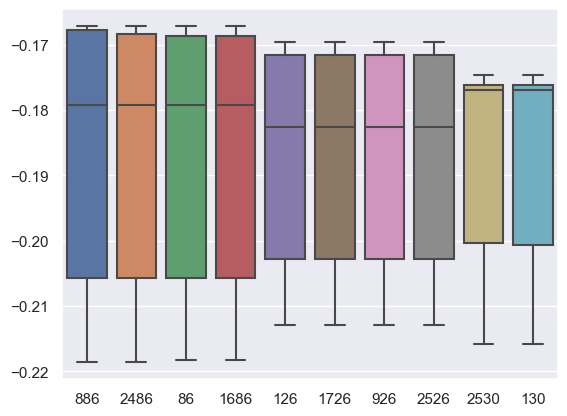

In [97]:
mask = grid_result_knn.index[grid_result_knn.index.str.endswith("_test_score")][:-3]
tabl = grid_result_knn.loc[mask].iloc[:,:10]
sns.boxplot(data=tabl);

grid_knn.best_params_

In [72]:
model = Pipeline([
                ('model', TransformedTargetRegressor(
                        regressor = Pipeline(steps=[
                                ('preproc', CT),
                                ('estimator', RandomForestRegressor())
                            ]),
                        transformer=PowerTransformer(),
                        check_inverse = False)
                )])

param_grid = {
    'model__regressor__estimator__oob_score': [True],
    'model__regressor__estimator__n_estimators': [20],
    'model__regressor__estimator__criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'model__regressor__estimator__max_depth': [None, 2, 4, 6, 8, 10],
    'model__regressor__estimator__min_samples_split': [2, 5, 8, 10],
    'model__regressor__estimator__min_samples_leaf': [1, 2, 4],
    'model__regressor__estimator__max_features': ['sqrt', 'log2'],
    'model__regressor__preproc__num__scaler': [StandardScaler(), RobustScaler(), MinMaxScaler(), Normalizer()],
    'model__transformer': [PowerTransformer(), QuantileTransformer()] 
}


grid_tree = GridSearchCV(model, param_grid, n_jobs = -1, scoring = 'neg_mean_absolute_percentage_error')
grid_tree.fit(X_train_new, y_train)
grid_tree

#3:10 3:17

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
2880 fits failed out of a total of 23040.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2880 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-pack

GridSearchCV(estimator=Pipeline(steps=[('model',
                                        TransformedTargetRegressor(check_inverse=False,
                                                                   regressor=Pipeline(steps=[('preproc',
                                                                                              ColumnTransformer(transformers=[('num',
                                                                                                                               Pipeline(steps=[('scaler',
                                                                                                                                                RobustScaler())]),
                                                                                                                               ['0',
                                                                                                                                '2',
                                                                                                                                '4',
                                                                                                                                '12',
                                                                                                                                '16',
                                                                                                                                '18',
                                                                                                                                '22',
                                                                                                                                '24',
                                                                                                                                '25',
                                                                                                                                '27'])])),
                                                                                             ('estimator',
                                                                                              RandomForestRegressor())]),
                                                                   transformer=PowerTransformer()))]),
             n_jobs=...
                         'model__regressor__estimator__min_samples_split': [2,
                                                                            5,
                                                                            8,
                                                                            10],
                         'model__regressor__estimator__n_estimators': [20],
                         'model__regressor__estimator__oob_score': [True],
                         'model__regressor__preproc__num__scaler': [StandardScaler(),
                                                                    RobustScaler(),
                                                                    MinMaxScaler(),
                                                                    Normalizer()],
                         'model__transformer': [PowerTransformer(),
                                                QuantileTransformer()]},
             scoring='neg_mean_absolute_percentage_error')

In [74]:
grid_result_tree = pd.DataFrame(grid_tree.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result_tree

,1232,2076,1184,1142,2414,2258,1168,1952,2186,2244,...,4588,4590,4592,4594,4596,4598,4600,4602,4604,4606
mean_fit_time,0.106388,0.123845,0.125425,0.085375,0.096391,0.102017,0.158737,0.099396,0.094781,0.096851,...,0.016028,0.016321,0.016506,0.019514,0.015798,0.015193,0.015521,0.016209,0.015318,0.012927
std_fit_time,0.010336,0.028481,0.016818,0.001116,0.005694,0.005968,0.039465,0.003547,0.001026,0.007613,...,0.001356,0.001047,0.001406,0.00232,0.001719,0.000871,0.000863,0.002788,0.0029,0.006631
mean_score_time,0.011001,0.008907,0.007797,0.007317,0.007198,0.0067,0.008,0.006727,0.00886,0.009688,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std_score_time,0.004333,0.001784,0.001312,0.000405,0.00039,0.00039,0.001678,0.000403,0.007295,0.00791,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
param_model__regressor__estimator__criterion,absolute_error,absolute_error,absolute_error,squared_error,friedman_mse,absolute_error,absolute_error,absolute_error,absolute_error,absolute_error,...,poisson,poisson,poisson,poisson,poisson,poisson,poisson,poisson,poisson,poisson
param_model__regressor__estimator__max_depth,None,8,None,10,None,10,None,8,10,10,...,10,10,10,10,10,10,10,10,10,10
param_model__regressor__estimator__max_features,sqrt,log2,sqrt,log2,log2,log2,sqrt,sqrt,sqrt,log2,...,log2,log2,log2,log2,log2,log2,log2,log2,log2,log2
param_model__regressor__estimator__min_samples_leaf,4,2,2,4,1,2,1,2,4,2,...,4,4,4,4,4,4,4,4,4,4
param_model__regressor__estimator__min_samples_split,8,10,2,8,5,8,8,2,5,2,...,5,5,8,8,8,8,10,10,10,10
param_model__regressor__estimator__n_estimators,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20


In [81]:
model = Pipeline([
                ('model', TransformedTargetRegressor(
                        regressor = Pipeline(steps=[
                                ('preproc', CT),
                                ('estimator', RandomForestRegressor(criterion = 'absolute_error',
                                                                   max_depth = None,
                                                                   max_features = 'sqrt',
                                                                   min_samples_leaf = 2,
                                                                   min_samples_split = 2,
                                                                   n_estimators = 1000,
                                                                   oob_score = True))
                            ]),
                        transformer=PowerTransformer(),
                        check_inverse = False)
                )])
model.fit(X_train_new, y_train)
y_pred = model.predict(X_test_new)
mean_absolute_percentage_error(y_test, y_pred)

cross_val_score(model, X_train_new, y_train, scoring = 'neg_mean_absolute_percentage_error').mean()

-0.18243224290534182

{'model__regressor__estimator__criterion': 'absolute_error',
 'model__regressor__estimator__max_depth': None,
 'model__regressor__estimator__max_features': 'sqrt',
 'model__regressor__estimator__min_samples_leaf': 4,
 'model__regressor__estimator__min_samples_split': 8,
 'model__regressor__estimator__n_estimators': 20,
 'model__regressor__estimator__oob_score': True,
 'model__regressor__preproc__num__scaler': StandardScaler(),
 'model__transformer': PowerTransformer()}

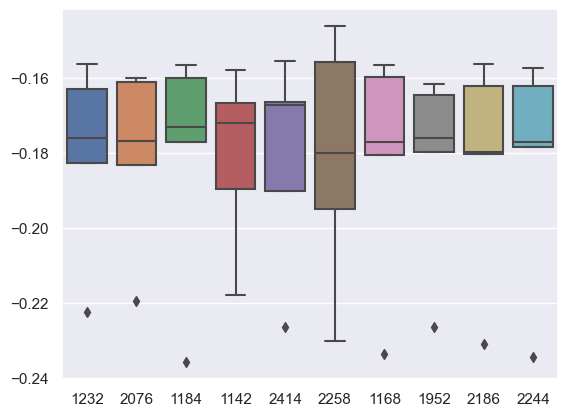

In [76]:
mask = grid_result_tree.index[grid_result_tree.index.str.endswith("_test_score")][:-3]
tabl = grid_result_tree.loc[mask].iloc[:,:10]
sns.boxplot(data=tabl);

grid_tree.best_params_

In [85]:
model = Pipeline([
                ('model', TransformedTargetRegressor(
                        regressor = Pipeline(steps=[
                                ('preproc', CT),
                                ('estimator', Ridge())
                            ]),
                        transformer=PowerTransformer(),
                        check_inverse = False)
                )])


param_grid = [
    {
    'model__regressor__estimator__alpha': [0, .2, .4, .6, .8, 1, 5, 10, 20, 50, 100, 200, 500],
    'model__regressor__estimator__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'model__regressor__preproc__num__scaler': [StandardScaler(), RobustScaler(), MinMaxScaler(), Normalizer()],
    'model__transformer': [PowerTransformer(), QuantileTransformer()],
    }]


grid_r = GridSearchCV(model, param_grid, scoring = 'neg_mean_absolute_percentage_error', n_jobs=-1)
grid_r.fit(X_train_new, y_train)
grid_r


GridSearchCV(estimator=Pipeline(steps=[('model',
                                        TransformedTargetRegressor(check_inverse=False,
                                                                   regressor=Pipeline(steps=[('preproc',
                                                                                              ColumnTransformer(transformers=[('num',
                                                                                                                               Pipeline(steps=[('scaler',
                                                                                                                                                RobustScaler())]),
                                                                                                                               ['0',
                                                                                                                                '2',
                                                                                                                                '4',
                                                                                                                                '12',
                                                                                                                                '16',
                                                                                                                                '18',
                                                                                                                                '22',
                                                                                                                                '24',
                                                                                                                                '25',
                                                                                                                                '27'])])),
                                                                                             ('estimator',
                                                                                              Ridge())]),
                                                                   transformer=PowerTransformer()))]),
             n_jobs=-1,
             param_grid=[{...2, 0.4,
                                                                 0.6, 0.8, 1, 5,
                                                                 10, 20, 50,
                                                                 100, 200,
                                                                 500],
                          'model__regressor__estimator__solver': ['auto', 'svd',
                                                                  'cholesky',
                                                                  'lsqr',
                                                                  'sparse_cg',
                                                                  'sag',
                                                                  'saga'],
                          'model__regressor__preproc__num__scaler': [StandardScaler(),
                                                                     RobustScaler(),
                                                                     MinMaxScaler(),
                                                                     Normalizer()],
                          'model__transformer': [PowerTransformer(),
                                                 QuantileTransformer()]}],
             scoring='neg_mean_absolute_percentage_error')

In [88]:
grid_result_ridge = pd.DataFrame(grid_r.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result_ridge

,382,390,342,358,350,374,366,326,294,286,...,711,719,727,717,709,677,693,685,725,701
mean_fit_time,0.015438,0.017415,0.014514,0.016314,0.016412,0.016744,0.017005,0.016928,0.016199,0.017027,...,0.019901,0.013626,0.015611,0.015482,0.011535,0.013902,0.018068,0.019263,0.016648,0.018263
std_fit_time,0.001245,0.003845,0.000637,0.002086,0.0016,0.002417,0.00154,0.002174,0.002235,0.001781,...,0.004395,0.00523,0.00002,0.00698,0.009719,0.003433,0.003506,0.01229,0.002018,0.010918
mean_score_time,0.005401,0.004603,0.00533,0.005605,0.005517,0.005792,0.005826,0.006112,0.005591,0.005602,...,0.002474,0.006261,0.0,0.004325,0.007274,0.004948,0.00261,0.003126,0.002208,0.001397
std_score_time,0.000486,0.000491,0.001082,0.000789,0.000454,0.000749,0.000409,0.001864,0.000509,0.000501,...,0.00303,0.007668,0.0,0.006456,0.007092,0.006413,0.005219,0.006251,0.004417,0.002337
param_model__regressor__estimator__alpha,5,5,5,5,5,5,5,1,1,1,...,500,500,500,500,500,500,500,500,500,500
param_model__regressor__estimator__solver,sag,saga,auto,cholesky,svd,sparse_cg,lsqr,sag,svd,auto,...,sparse_cg,sag,saga,sag,sparse_cg,auto,cholesky,svd,saga,lsqr
param_model__regressor__preproc__num__scaler,Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),...,Normalizer(),Normalizer(),Normalizer(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler()
param_model__transformer,PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),...,QuantileTransformer(),QuantileTransformer(),QuantileTransformer(),QuantileTransformer(),QuantileTransformer(),QuantileTransformer(),QuantileTransformer(),QuantileTransformer(),QuantileTransformer(),QuantileTransformer()
params,"{'model__regressor__estimator__alpha': 5, 'mod...","{'model__regressor__estimator__alpha': 5, 'mod...","{'model__regressor__estimator__alpha': 5, 'mod...","{'model__regressor__estimator__alpha': 5, 'mod...","{'model__regressor__estimator__alpha': 5, 'mod...","{'model__regressor__estimator__alpha': 5, 'mod...","{'model__regressor__estimator__alpha': 5, 'mod...","{'model__regressor__estimator__alpha': 1, 'mod...","{'model__regressor__estimator__alpha': 1, 'mod...","{'model__regressor__estimator__alpha': 1, 'mod...",...,"{'model__regressor__estimator__alpha': 500, 'm...","{'model__regressor__estimator__alpha': 500, 'm...","{'model__regressor__estimator__alpha': 500, 'm...","{'model__regressor__estimator__alpha': 500, 'm...","{'model__regressor__estimator__alpha': 500, 'm...","{'model__regressor__estimator__alpha': 500, 'm...","{'model__regressor__estimator__alpha': 500, 'm...","{'model__regressor__estimator__alpha': 500, 'm...","{'model__regressor__estimator__alpha': 500, 'm...","{'model__regressor__estimator__alpha': 500, 'm..."
split0_test_score,-0.180356,-0.180355,-0.180355,-0.180355,-0.180355,-0.180351,-0.180351,-0.182325,-0.182323,-0.182323,...,-0.274296,-0.274296,-0.274297,-0.278557,-0.278557,-0.278557,-0.278557,-0.278557,-0.278557,-0.278559


{'model__regressor__estimator__alpha': 5,
 'model__regressor__estimator__solver': 'sag',
 'model__regressor__preproc__num__scaler': Normalizer(),
 'model__transformer': PowerTransformer()}

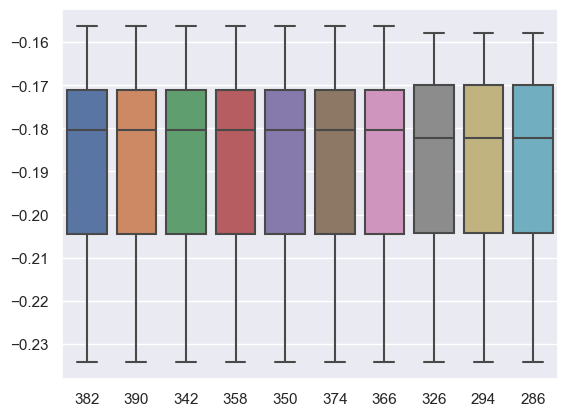

In [89]:
mask = grid_result_ridge.index[grid_result_ridge.index.str.endswith("_test_score")][:-3]
tabl = grid_result_ridge.loc[mask].iloc[:,:10]
sns.boxplot(data=tabl);

grid_r.best_params_

In [99]:
model = Pipeline([
                ('model', TransformedTargetRegressor(
                        regressor = Pipeline(steps=[
                                ('preproc', CT),
                                ('estimator', Lasso())
                            ]),
                        transformer=PowerTransformer(),
                        check_inverse = False)
                )])


param_grid = [
    {
    'model__regressor__estimator__alpha': [0, .1, .4, .6, .8, 1, 1.5, 2, 3, 5, 10, 20, 50, 100, 200, 500],
    'model__regressor__preproc__num__scaler': [StandardScaler(), RobustScaler(), MinMaxScaler(), Normalizer()],
    'model__transformer': [PowerTransformer(), QuantileTransformer()],
    }]


grid_l = GridSearchCV(model, param_grid, scoring = 'neg_mean_absolute_percentage_error', n_jobs=-1)
grid_l.fit(X_train_new, y_train)
grid_l

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.831e+01, tolerance: 3.060e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers impl

GridSearchCV(estimator=Pipeline(steps=[('model',
                                        TransformedTargetRegressor(check_inverse=False,
                                                                   regressor=Pipeline(steps=[('preproc',
                                                                                              ColumnTransformer(transformers=[('num',
                                                                                                                               Pipeline(steps=[('scaler',
                                                                                                                                                RobustScaler())]),
                                                                                                                               ['0',
                                                                                                                                '2',
                                                                                                                                '4',
                                                                                                                                '12',
                                                                                                                                '16',
                                                                                                                                '18',
                                                                                                                                '22',
                                                                                                                                '24',
                                                                                                                                '25',
                                                                                                                                '27'])])),
                                                                                             ('estimator',
                                                                                              Lasso())]),
                                                                   transformer=PowerTransformer()))]),
             n_jobs=-1,
             param_grid=[{'model__regressor__estimator__alpha': [0, 0.1, 0.4,
                                                                 0.6, 0.8, 1,
                                                                 1.5, 2, 3, 5,
                                                                 10, 20, 50,
                                                                 100, 200,
                                                                 500],
                          'model__regressor__preproc__num__scaler': [StandardScaler(),
                                                                     RobustScaler(),
                                                                     MinMaxScaler(),
                                                                     Normalizer()],
                          'model__transformer': [PowerTransformer(),
                                                 QuantileTransformer()]}],
             scoring='neg_mean_absolute_percentage_error')

In [100]:
grid_result_lasso = pd.DataFrame(grid_l.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result_lasso

,6,0,2,4,8,7,1,5,3,10,...,118,120,122,124,126,66,34,58,50,42
mean_fit_time,0.019636,0.023798,0.022995,0.019599,0.015134,0.020832,0.023128,0.018802,0.021312,0.01743,...,0.021446,0.014819,0.018475,0.014319,0.017599,0.022928,0.017111,0.017011,0.01806,0.018226
std_fit_time,0.001764,0.002314,0.001492,0.001204,0.000972,0.002775,0.005978,0.003663,0.001793,0.001272,...,0.007147,0.001644,0.003357,0.007627,0.002819,0.005363,0.000784,0.000632,0.001486,0.001291
mean_score_time,0.005818,0.007614,0.005399,0.005218,0.005009,0.005407,0.005414,0.0048,0.006015,0.005609,...,0.001394,0.004032,0.00791,0.003757,0.006981,0.006702,0.005416,0.005912,0.005586,0.004019
std_score_time,0.001725,0.001505,0.000479,0.000752,0.000022,0.000799,0.001858,0.000405,0.001552,0.001209,...,0.002788,0.006058,0.006038,0.003348,0.001329,0.001797,0.000784,0.001185,0.000799,0.000642
param_model__regressor__estimator__alpha,0,0,0,0,0.1,0,0,0,0,0.1,...,200,500,500,500,500,3,0.8,2,1.5,1
param_model__regressor__preproc__num__scaler,Normalizer(),StandardScaler(),RobustScaler(),MinMaxScaler(),StandardScaler(),Normalizer(),StandardScaler(),MinMaxScaler(),RobustScaler(),RobustScaler(),...,Normalizer(),StandardScaler(),RobustScaler(),MinMaxScaler(),Normalizer(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler()
param_model__transformer,PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),QuantileTransformer(),QuantileTransformer(),QuantileTransformer(),QuantileTransformer(),PowerTransformer(),...,PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer()
params,"{'model__regressor__estimator__alpha': 0, 'mod...","{'model__regressor__estimator__alpha': 0, 'mod...","{'model__regressor__estimator__alpha': 0, 'mod...","{'model__regressor__estimator__alpha': 0, 'mod...","{'model__regressor__estimator__alpha': 0.1, 'm...","{'model__regressor__estimator__alpha': 0, 'mod...","{'model__regressor__estimator__alpha': 0, 'mod...","{'model__regressor__estimator__alpha': 0, 'mod...","{'model__regressor__estimator__alpha': 0, 'mod...","{'model__regressor__estimator__alpha': 0.1, 'm...",...,"{'model__regressor__estimator__alpha': 200, 'm...","{'model__regressor__estimator__alpha': 500, 'm...","{'model__regressor__estimator__alpha': 500, 'm...","{'model__regressor__estimator__alpha': 500, 'm...","{'model__regressor__estimator__alpha': 500, 'm...","{'model__regressor__estimator__alpha': 3, 'mod...","{'model__regressor__estimator__alpha': 0.8, 'm...","{'model__regressor__estimator__alpha': 2, 'mod...","{'model__regressor__estimator__alpha': 1.5, 'm...","{'model__regressor__estimator__alpha': 1, 'mod..."
split0_test_score,-0.183431,-0.174573,-0.174573,-0.174573,-0.180564,-0.188028,-0.187708,-0.187708,-0.187708,-0.180818,...,-0.290472,-0.290472,-0.290472,-0.290472,-0.290472,-0.290729,-0.293488,-0.291999,-0.292621,-0.293232
split1_test_score,-0.204999,-0.201669,-0.201669,-0.201669,-0.202015,-0.218402,-0.219735,-0.219735,-0.219735,-0.210128,...,-0.285797,-0.285797,-0.285797,-0.285797,-0.285797,-0.285797,-0.285784,-0.285797,-0.285797,-0.285797


{'model__regressor__estimator__alpha': 0,
 'model__regressor__preproc__num__scaler': Normalizer(),
 'model__transformer': PowerTransformer()}

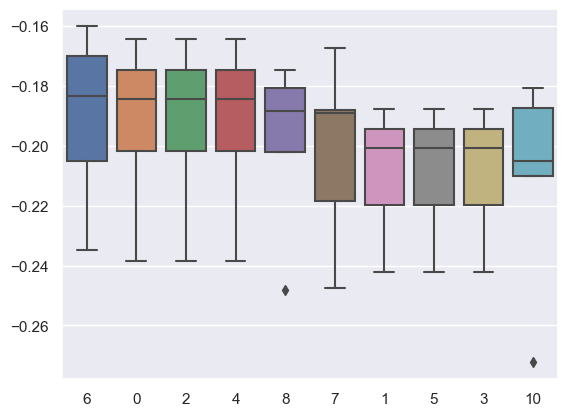

In [101]:
mask = grid_result_lasso.index[grid_result_lasso.index.str.endswith("_test_score")][:-3]
tabl = grid_result_lasso.loc[mask].iloc[:,:10]
sns.boxplot(data=tabl);

grid_l.best_params_

In [ ]:
{'model__regressor__estimator__alpha': 5,
 'model__regressor__estimator__solver': 'sag',
 'model__regressor__preproc__num__scaler': Normalizer(),
 'model__transformer': PowerTransformer()}

In [106]:
#результат
knn = Pipeline([
                ('model', TransformedTargetRegressor(
                        regressor = Pipeline(steps=[
                                ('preproc', CT),
                                ('estimator', KNeighborsRegressor(algorithm='ball_tree', n_neighbors=31, p = 2, weights = 'uniform'))
                            ]),
                        transformer=PowerTransformer(),
                        check_inverse = False)
                )])


rf = Pipeline([
                ('model', TransformedTargetRegressor(
                        regressor = Pipeline(steps=[
                                ('preproc', CT),
                                ('estimator', RandomForestRegressor(criterion = 'absolute_error',
                                                                   max_depth = None,
                                                                   max_features = 'sqrt',
                                                                   min_samples_leaf = 2,
                                                                   min_samples_split = 2,
                                                                   n_estimators = 1000,
                                                                   oob_score = True))
                            ]),
                        transformer=PowerTransformer(),
                        check_inverse = False)
                )])

ridge = Pipeline([
                ('model', TransformedTargetRegressor(
                        regressor = Pipeline(steps=[
                                ('preproc', CT),
                                ('estimator', Ridge(solver='sag', alpha=5, max_iter = 10000))
                            ]),
                        transformer=PowerTransformer(),
                        check_inverse = False)
                )])

lasso = Pipeline([
                ('model', TransformedTargetRegressor(
                        regressor = Pipeline(steps=[
                                ('preproc', CT),
                                ('estimator', Ridge(alpha = 0, max_iter = 10000))
                            ]),
                        transformer=PowerTransformer(),
                        check_inverse = False)
                )])


In [121]:
estimators = [
    ('knn', knn),
    ('rf', rf),
    ('ridge', ridge),
    ('lasso', lasso)
]

st_reg = StackingRegressor(estimators = estimators, final_estimator = Ridge())

st_reg.fit(X_train, y_train)

cross_val_score(st_reg, X_test_new, y_test, scoring = 'neg_mean_absolute_percentage_error')

array([-0.2110153 , -0.19231348, -0.1877603 , -0.14999554, -0.18313326])

In [120]:
vt_reg = VotingRegressor(estimators = estimators)

vt_reg.fit(X_train_new, y_train)
cross_val_score(vt_reg, X_test_new, y_test, scoring = 'neg_mean_absolute_percentage_error')

array([-0.18825517, -0.18180046, -0.20506204, -0.17307811, -0.19053944])

In [119]:
mean_absolute_percentage_error(y_test, st_reg.predict(X_test_new))

0.19400153429881398